In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [411]:
import imblearn
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [496]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

In [413]:
dataset = pd.read_excel('default of credit card clients.xls',header=1)

In [3]:
dataset
    

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [100]:
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [101]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [102]:
dataset.rename(columns={'PAY_0':'PAY_1','default payment next month':'next_month_payment'},inplace=True)

In [103]:
dataset.columns = map(str.lower, dataset.columns)

In [104]:
dataset

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,next_month_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [105]:
dataset.dtypes

id                    int64
limit_bal             int64
sex                   int64
education             int64
marriage              int64
age                   int64
pay_1                 int64
pay_2                 int64
pay_3                 int64
pay_4                 int64
pay_5                 int64
pay_6                 int64
bill_amt1             int64
bill_amt2             int64
bill_amt3             int64
bill_amt4             int64
bill_amt5             int64
bill_amt6             int64
pay_amt1              int64
pay_amt2              int64
pay_amt3              int64
pay_amt4              int64
pay_amt5              int64
pay_amt6              int64
next_month_payment    int64
dtype: object

In [106]:
dataset['education'].values.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [107]:
dataset.groupby('next_month_payment')['education'].value_counts()

next_month_payment  education
0                   2            10700
                    1             8549
                    3             3680
                    5              262
                    4              116
                    6               43
                    0               14
1                   2             3330
                    1             2036
                    3             1237
                    5               18
                    6                8
                    4                7
Name: education, dtype: int64

In [108]:
dataset['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [109]:
dataset['sex'].value_counts()

2    18112
1    11888
Name: sex, dtype: int64

In [110]:
dataset['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [111]:
dataset['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [112]:
dataset['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

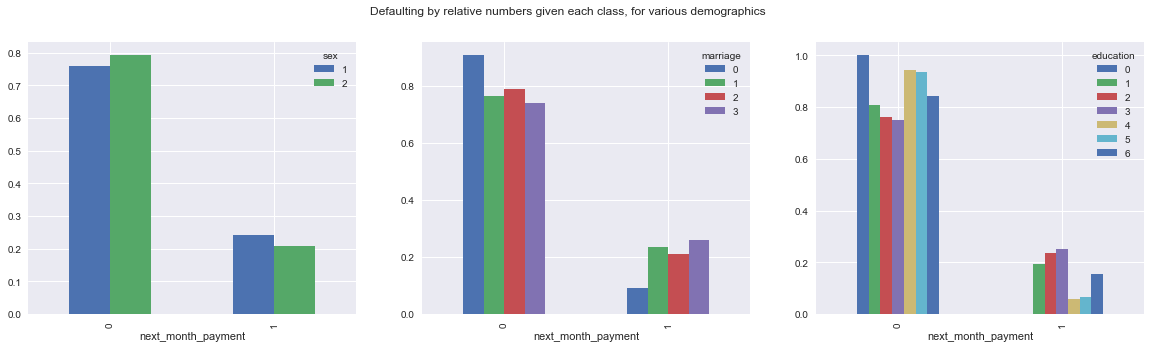

In [19]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = dataset.groupby(['next_month_payment', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = dataset.groupby(['next_month_payment', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = dataset.groupby(['next_month_payment', 'education']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

In [67]:
dataset[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']].describe()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [113]:
dataset[dataset.pay_1 < 1][['bill_amt2', 'pay_amt1', 'bill_amt1', 'pay_1']].sample(20)


,bill_amt2,pay_amt1,bill_amt1,pay_1
21239,364447,16025,452600,0
10332,22369,0,23025,-2
24644,0,0,0,-2
4972,49052,2200,49722,0
22000,57421,5000,56701,0
26396,480,482,5754,-2
10934,0,0,0,-2
15591,1270,1282,-12,-2
11698,6712,6734,4762,-1
5428,19700,3183,17565,0


In [114]:
dataset[dataset.pay_1 > 3][['bill_amt2', 'pay_amt1', 'bill_amt1', 'pay_1']].sample(20)

,bill_amt2,pay_amt1,bill_amt1,pay_1
7666,30100,0,34213,4
11243,29399,206,29944,4
2756,240966,0,254266,7
24906,45734,0,46750,5
2421,16002,0,16549,4
19322,76247,0,126220,7
25192,35146,0,37695,4
7946,22246,0,22858,7
26784,152142,3200,152924,4
4507,31973,0,32755,5


In [115]:
fil = (dataset.pay_1 == -2) | (dataset.pay_1 == -1) | (dataset.pay_1 == 0)
dataset.loc[fil, 'pay_1'] = 0
fil = (dataset.pay_2 == -2) | (dataset.pay_2 == -1) | (dataset.pay_2 == 0)
dataset.loc[fil, 'pay_2'] = 0
fil = (dataset.pay_3 == -2) | (dataset.pay_3 == -1) | (dataset.pay_3 == 0)
dataset.loc[fil, 'pay_3'] = 0
fil = (dataset.pay_4 == -2) | (dataset.pay_4 == -1) | (dataset.pay_4 == 0)
dataset.loc[fil, 'pay_4'] = 0
fil = (dataset.pay_5 == -2) | (dataset.pay_5 == -1) | (dataset.pay_5 == 0)
dataset.loc[fil, 'pay_5'] = 0
fil = (dataset.pay_6 == -2) | (dataset.pay_6 == -1) | (dataset.pay_6 == 0)
dataset.loc[fil, 'pay_6'] = 0
dataset[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [116]:
fil = ((dataset.limit_bal < dataset.bill_amt1) | 
      (dataset.limit_bal < dataset.bill_amt2) |
      (dataset.limit_bal < dataset.bill_amt3) |
      (dataset.limit_bal < dataset.bill_amt4) |
      (dataset.limit_bal < dataset.bill_amt5) |
      (dataset.limit_bal < dataset.bill_amt6))
dataset[fil].next_month_payment.value_counts()

0    2748
1    1183
Name: next_month_payment, dtype: int64

In [117]:
dataset.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_payment'],
      dtype='object')

In [118]:
dataset[['bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6','limit_bal', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_payment']].sample(20)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,limit_bal,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,next_month_payment
2544,13896,12906,13983,10983,5400,0,20000,2000,2500,2000,0,0,0,1
6727,216096,189566,183838,157898,164860,168294,220000,10110,12000,5852,10000,6610,5836,0
17679,36467,40505,43333,36959,27296,23474,70000,5000,5000,1500,546,1000,1746,0
7877,251931,301458,234316,199360,163408,186618,500000,101458,10009,20071,20000,35565,18000,0
17993,26595,33330,36720,40729,44762,48914,220000,9000,5000,5000,5000,5000,5000,0
22683,50663,50847,50768,50629,49974,49897,140000,1788,2182,2041,1715,1982,30000,0
6375,78293,79555,77025,76991,79066,75356,80000,3161,4000,3000,3500,3100,5700,0
4834,22492,-2018,-718,1282,81988,83665,120000,1534,1300,2000,81899,3200,4000,0
21169,20604,21614,24535,23778,24255,24630,150000,1359,3280,0,1000,750,681,0
27485,148265,158230,160242,156171,165556,169250,300000,14000,6000,0,12000,6500,6500,1


In [119]:
fil = ((dataset.pay_amt1 > dataset.bill_amt2) & dataset.pay_1 > 0)
dataset[fil][['bill_amt1', 'pay_1', 'limit_bal', 'next_month_payment']]

,bill_amt1,pay_1,limit_bal,next_month_payment
26,-109,1,60000,1
68,-190,1,130000,0
109,-103,1,360000,0
149,-1100,1,260000,0
173,-709,1,50000,1
186,2616,1,360000,0
216,-946,1,240000,1
319,-2,1,180000,0
330,-179,1,200000,1
351,-14386,1,200000,0


In [120]:
dataset.isnull().sum()

id                    0
limit_bal             0
sex                   0
education             0
marriage              0
age                   0
pay_1                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
bill_amt1             0
bill_amt2             0
bill_amt3             0
bill_amt4             0
bill_amt5             0
bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
next_month_payment    0
dtype: int64

In [11]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [414]:
def check_missing_values(dataset):
    c = dataset.isnull().sum()
    c.to_frame().reset_index()
    for i in range(0, 25):
        
        if(c[i] == 0):
            continue
        else:
            print("Missing value present")
            return False
    return True

In [415]:
def replacing_missing_values(dataset):
    data = check_missing_values(dataset)
    if(data == False):
        new_data = pd.DataFrame()
        dataset['limit_bal'].dropna(inplace = True)
        dataset['sex'].dropna(inplace = True)
        dataset['education'].dropna(inplace = True)
        dataset['marriage'].dropna(inplace = True)
        dataset['age'].dropna(inplace = True)
        new_data = dataset
        return new_data
    else:
        return dataset

In [416]:
def feature_engineering(dataset):
    dataset = replacing_missing_values(dataset)
    dataset.rename(columns={'PAY_0':'PAY_1','default payment next month':'next_month_payment'},inplace=True)
    dataset.columns = map(str.lower, dataset.columns)
    filedu = (dataset.education == 5)|(dataset.education == 6)|(dataset.education == 0)
    dataset.loc[filedu,'education'] = 4  
    filmarra = (dataset.marriage == 0)
    dataset.loc[filmarra,'marriage'] = 3
    fil = (dataset.pay_1 == -2) | (dataset.pay_1 == -1) | (dataset.pay_1 == 0)
    dataset.loc[fil, 'pay_1'] = 0
    fil = (dataset.pay_2 == -2) | (dataset.pay_2 == -1) | (dataset.pay_2 == 0)
    dataset.loc[fil, 'pay_2'] = 0
    fil = (dataset.pay_3 == -2) | (dataset.pay_3 == -1) | (dataset.pay_3 == 0)
    dataset.loc[fil, 'pay_3'] = 0
    fil = (dataset.pay_4 == -2) | (dataset.pay_4 == -1) | (dataset.pay_4 == 0)
    dataset.loc[fil, 'pay_4'] = 0
    fil = (dataset.pay_5 == -2) | (dataset.pay_5 == -1) | (dataset.pay_5 == 0)
    dataset.loc[fil, 'pay_5'] = 0
    fil = (dataset.pay_6 == -2) | (dataset.pay_6 == -1) | (dataset.pay_6 == 0)
    dataset.loc[fil, 'pay_6'] = 0
    dataset['AgeBin'] = pd.cut(dataset['age'], 6, labels = [1,2,3,4,5,6])
    dataset['AgeBin'] = pd.to_numeric(dataset['AgeBin'])
    return dataset
    

In [8]:
data = feature_engineering(dataset)

In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
id                    30000 non-null int64
limit_bal             30000 non-null int64
sex                   30000 non-null int64
education             30000 non-null int64
marriage              30000 non-null int64
age                   30000 non-null int64
pay_1                 30000 non-null int64
pay_2                 30000 non-null int64
pay_3                 30000 non-null int64
pay_4                 30000 non-null int64
pay_5                 30000 non-null int64
pay_6                 30000 non-null int64
bill_amt1             30000 non-null int64
bill_amt2             30000 non-null int64
bill_amt3             30000 non-null int64
bill_amt4             30000 non-null int64
bill_amt5             30000 non-null int64
bill_amt6             30000 non-null int64
pay_amt1              30000 non-null int64
pay_amt2              30000 non-null int64
pay_amt3              30000 non

In [19]:
data.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_payment', 'AgeBin'],
      dtype='object')

In [688]:
X = data[['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]

y = data['next_month_payment']

NameError: name 'data' is not defined

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators=40, max_depth=10)

rf.fit(X_train, y_train)
prediction_train = rf.predict(X_test)

#r2_train = r2_score(y_train, prediction_train)
#mse_train = mean_squared_error(y_train, prediction_train)
#mae_train = mean_absolute_error(y_train, prediction_train)
#rmse_train = np.sqrt(mse_train)
#mape_train =  np.mean(np.abs((y_train-prediction_train) / y_train) ) * 100
x =confusion_matrix(y_test, prediction_train)
print(x)

print('Accuracy testing for Train data :' , accuracy_score(y_test, prediction_train))



[[4450  237]
 [ 853  460]]
Accuracy testing for Train data : 0.818333333333


In [164]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)
x =confusion_matrix(y_test, pred)
print(x)
# evaluate accuracy
print('Accuracy testing for Train data :' , accuracy_score(y_test, pred))

[[4482  205]
 [1174  139]]
Accuracy testing for Train data : 0.770166666667


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
x = confusion_matrix(y_test,prediction)
print(x)
print('Accuracy testing for Train data :' , accuracy_score(y_test, prediction))

[[4687    0]
 [1313    0]]
Accuracy testing for Train data : 0.781166666667


In [32]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 77.05


In [36]:
y.value_counts()

0    23364
1     6636
Name: next_month_payment, dtype: int64

In [12]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
np.bincount(y_res)

array([23364, 23364], dtype=int64)

In [15]:
from sklearn.cross_validation import train_test_split
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .2,
                                                    random_state=12)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [337]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators=40, max_depth=10)

rf.fit(x_train_res, y_train_res)

filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
RandomForest_model = pickle.load(open(filename, 'rb'))
result = RandomForest_model.score(x_val_res,y_val_res)
print(result)
#prediction_train = rf.predict(x_val_res)

#r2_train = r2_score(y_train, prediction_train)
#mse_train = mean_squared_error(y_train, prediction_train)
#mae_train = mean_absolute_error(y_train, prediction_train)
#rmse_train = np.sqrt(mse_train)
#mape_train =  np.mean(np.abs((y_train-prediction_train) / y_train) ) * 100
#x =confusion_matrix(y_val_res, prediction_train)
#print(x)

#print('Accuracy testing for Train data :' , accuracy_score(y_val_res, prediction_train))


0.852664241387


In [17]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
knn.fit(x_train_res, y_train_res)

# predict the response
pred = knn.predict(x_val_res)
x =confusion_matrix(y_val_res, pred)
print(x)
# evaluate accuracy
print('Accuracy testing for Train data :' , accuracy_score(y_val_res, pred))

[[3300 1406]
 [ 859 3781]]
Accuracy testing for Train data : 0.757650331693


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
lr = LogisticRegression()

# fitting the model
lr.fit(x_train_res, y_train_res)

# predict the response
pred = lr.predict(x_val_res)
x =confusion_matrix(y_val_res, pred)
print(x)
# evaluate accuracy
print('Accuracy testing for Train data :' , accuracy_score(y_val_res, pred))

[[2370 2336]
 [1169 3471]]
Accuracy testing for Train data : 0.624973250588


In [18]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(x_train_res, y_train_res)
 
# making predictions on the testing set
y_pred = gnb.predict(x_val_res)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_val_res, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 74.0316713032


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
 
# making predictions on the testing set
y_pred = gnb.predict(x_val_res)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_val_res, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 53.9910121977


In [24]:
print(classification_report_imbalanced(y_test, rf.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.93      0.50      0.90      0.68      0.49      4687
          1       0.68      0.50      0.93      0.58      0.68      0.45      1313

avg / total       0.83      0.84      0.60      0.83      0.68      0.48      6000



In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train_res)
# Now apply the transformations to the data:
x_train_res = scaler.transform(x_train_res)
x_val_res = scaler.transform(x_val_res)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(x_train_res,y_train_res)
prediction = mlp.predict(x_val_res)
x =confusion_matrix(y_val_res, prediction)
print(x)
# evaluate accuracy
print('Accuracy testing for Train data :' , accuracy_score(y_val_res, prediction))

[[4059  647]
 [ 953 3687]]
Accuracy testing for Train data : 0.828803766317


In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators = 500 , random_state = np.random)
model.fit(x_train_res, y_train_res)
prediction = model.predict(x_val_res)
x =confusion_matrix(y_val_res, prediction)
print(x)
# evaluate accuracy
print('Accuracy testing for Train data :' , accuracy_score(y_val_res, prediction))

[[4373  333]
 [ 678 3962]]
Accuracy testing for Train data : 0.891825379842


In [33]:
from imblearn.metrics import sensitivity_score
print("rf :" ,sensitivity_score(y_test,rf.predict(X_test)))
print("knn :" ,sensitivity_score(y_test,knn.predict(X_test)))
print("lr :" , sensitivity_score(y_test,lr.predict(X_test)))
print("nb :" , sensitivity_score(y_test,gnb.predict(X_test)))


rf : 0.501142421935
knn : 0.818735719726
lr : 0.0
nb : 0.503427265804


In [34]:
from imblearn.metrics import specificity_score
print("rf :" ,specificity_score(y_test,rf.predict(X_test)))
print("knn :" ,specificity_score(y_test,knn.predict(X_test)))
print("lr :" , specificity_score(y_test,lr.predict(X_test)))
print("nb :" , specificity_score(y_test,gnb.predict(X_test)))

rf : 0.933432899509
knn : 0.820994239386
lr : 1.0
nb : 0.845316833796


In [35]:
from imblearn.metrics import sensitivity_score
print("rf :" ,sensitivity_score(y_val_res,rf.predict(x_val_res)))
print("knn :" ,sensitivity_score(y_val_res,knn.predict(x_val_res)))
print("lr :" , sensitivity_score(y_val_res,lr.predict(x_val_res)))
print("nb :" , sensitivity_score(y_val_res,gnb.predict(x_val_res)))

rf : 0.789224137931
knn : 0.814870689655
lr : 0.0
nb : 0.573275862069


In [36]:
from imblearn.metrics import specificity_score
print("rf :" ,specificity_score(y_val_res,rf.predict(x_val_res)))
print("knn :" ,specificity_score(y_val_res,knn.predict(x_val_res)))
print("lr :" , specificity_score(y_val_res,lr.predict(x_val_res)))
print("nb :" , specificity_score(y_val_res,gnb.predict(x_val_res)))

rf : 0.917127071823
knn : 0.701232469188
lr : 1.0
nb : 0.84381640459


In [700]:
def split_dataset(dataset):
    data = feature_engineering(dataset)
    X = data[['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

    y = data['next_month_payment']
    return X, y
    

In [690]:
X,y = split_dataset(dataset)

In [701]:
def sampling(dataset):
    X,y  = split_dataset(dataset)
    sm = SMOTE(random_state=12, ratio = 1.0)
    x_res, y_res = sm.fit_sample(X, y)
    return x_res,y_res

In [44]:
x1 , y1 = sampling(dataset)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [702]:
def train_test(dataset):
    x_res, y_res = sampling(dataset)
    x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .2,
                                                    random_state=12)
    return x_train_res, x_val_res, y_train_res, y_val_res
    

In [747]:
def random_forest(dataset):
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
    rf = RandomForestClassifier(n_estimators=40, max_depth=10)
    rf.fit(x_train_res, y_train_res)

    filename = 'rf_model.pckl'
    pickle.dump(rf, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    RandomForest_model = pickle.load(open(filename, 'rb'))
    return RandomForest_model
    #result = RandomForest_model.score(x_val_res,y_val_res)
    #print(result)

In [748]:
def k_n(dataset):
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
    knn.fit(x_train_res, y_train_res)
    filename = 'knn_model.pckl'
    pickle.dump(knn, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    K_nearest_model = pickle.load(open(filename, 'rb'))
    return K_nearest_model


In [749]:
def logReg(dataset):
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    lr = LogisticRegression()

# fitting the model
    lr.fit(x_train_res, y_train_res)
    filename = 'lr_model.pckl'
    pickle.dump(lr, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    Log_Reg_model = pickle.load(open(filename, 'rb'))
    return Log_Reg_model

In [750]:
def BernouNb(dataset):
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    bnb = BernoulliNB()

# fitting the model
    bnb.fit(x_train_res, y_train_res)
    filename = 'bnb_model.pckl'
    pickle.dump(bnb, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    Bernoulli_Nb_model = pickle.load(open(filename, 'rb'))
    return Bernoulli_Nb_model

In [761]:
def ex_tr(dataset):
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    extr = ExtraTreesClassifier(n_estimators = 500, random_state = 123)

# fitting the model
    extr.fit(x_train_res, y_train_res)
    filename = 'extra_tree_model.pckl'
    pickle.dump(extr, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    Extra_Tree_model = pickle.load(open(filename, 'rb'))
    return Extra_Tree_model

In [762]:
def models(dataset):
    randomForest_model = random_forest(dataset)
    K_nearest_model = k_n(dataset)
    Log_Reg_model = logReg(dataset)
    Bernoulli_Nb_model = BernouNb(dataset)
    Extra_Tree_model = ex_tr(dataset)
    #ExtraTreez_model = xtraTree(dataset)
    model = [randomForest_model,
             K_nearest_model,
             Log_Reg_model,
             Bernoulli_Nb_model,
             Extra_Tree_model
             #ExtraTreez_model
             #RandomForestClassifier(n_estimators=40, max_depth=10),
             #KNeighborsClassifier(n_neighbors=4),
             #LogisticRegression(),
             #BernoulliNB(),
             #ExtraTreesClassifier(n_estimators = 500 , random_state = 123)
            ]
    #import os
    #here = os.path.dirname(os.path.abspath(__file__)
    #with open(os.path.join("models.pckl"), 'wb') as filename:
    #    for models in model:
    #        print("loop")
    #        pickle.dump(models, filename)
    #        print("dumped")
    return(model)

In [753]:
models(dataset)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\de

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform'),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, crit

In [763]:
def fit_model(model,dataset):
    #prediction=[]
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
    #for i in range(0,len(model)):
 
    #models = np.array(model) 
    #model.fit(x_train_res,y_train_res)
    prediction = model.predict(x_val_res)
    f1score = f1_score(y_val_res, prediction)
    accuracy = accuracy_score(y_val_res, prediction)
    cm = confusion_matrix(y_val_res, prediction)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    #print (models)
    return f1score,accuracy,tp,fp,fn,tn

    

In [543]:
fit_model(dataset)

TypeError: fit_model() missing 1 required positional argument: 'dataset'

In [450]:
type(X)

pandas.core.frame.DataFrame

In [451]:
y.shape

(30000,)

In [764]:
def accuracyscore(dataset):
    #models = []
    #here = os.path.dirname(os.path.abspath(__file__))
    #with open(os.path.join("models.pckl"), 'rb') as filename:
    #    while True:
    #        try:
    #            print("trying")
    #            models.append(pickle.load(filename))
    #            print("appended")
    #        except EOFError:
    #            break
    model = models(dataset)
    #print(models)
    accuracy =[]
    model_name =[]
    f1score = []
    true_positive =[]
    false_positive =[]
    true_negative =[]
    false_negative =[]
    for i in range(0,len(model)):
        f,a,tp,fp,fn,tn = fit_model(model[i],dataset)
        model_name.append(str(model[i]).split("(")[0])
        f1score.append(f)
        accuracy.append(a)
        #matrix.append(cm)
        true_positive.append(tp) 
        false_positive.append(fp)
        true_negative.append(fn) 
        false_negative.append(tn)    
    return model_name,f1score,accuracy,true_positive,false_positive,true_negative,false_negative

In [765]:
#cs1 = pd.DataFrame()
#cs1 = csv1


summary2 = accuracyscore(dataset)
summary2   


   # accuracyscore(dataset)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\de

(['RandomForestClassifier',
  'KNeighborsClassifier',
  'LogisticRegression',
  'BernoulliNB',
  'ExtraTreesClassifier'],
 [0.81890874882408282,
  0.74735552833760166,
  0.61705302954929853,
  0.59290471659643873,
  0.84061839617395173],
 [0.83522362508024828,
  0.75722234110849562,
  0.5881660603466724,
  0.67954205007489832,
  0.84667237320778943],
 [4324, 3721, 2396, 4170, 4134],
 [382, 985, 2310, 536, 572],
 [1158, 1284, 1539, 2459, 861],
 [3482, 3356, 3101, 2181, 3779])

In [652]:
summary2

(['RandomForestClassifier',
  'KNeighborsClassifier',
  'LogisticRegression',
  'BernoulliNB'],
 [0.8473256213492153,
  0.76951256741630203,
  0.66449698478031971,
  0.6937539432176657],
 [0.85737213781296806,
  0.75765033169270279,
  0.62497325058848707,
  0.74031671303231328],
 [4314, 3300, 2370, 4170],
 [392, 1406, 2336, 536],
 [941, 859, 1169, 1891],
 [3699, 3781, 3471, 2749])

In [757]:
def performance_metrics(dataset):
    summary2 = accuracyscore(dataset)
    describe1 = pd.DataFrame(summary2[0],columns = {"Model_Name"})
    describe2 = pd.DataFrame(summary2[1],columns = {"F1_score"})
    describe3 = pd.DataFrame(summary2[2], columns ={"Accuracy_score"})
    describe4 = pd.DataFrame(summary2[3], columns ={"True_Positive"})
    describe5 = pd.DataFrame(summary2[4], columns ={"False_Positive"})
    describe6 = pd.DataFrame(summary2[5], columns ={"True_Negative"})
    describe7 = pd.DataFrame(summary2[6], columns ={"False_Negative"})
    des = describe1.merge(describe2, left_index=True, right_index=True, how='inner')
    des = des.merge(describe3,left_index=True, right_index=True, how='inner')
    des = des.merge(describe4,left_index=True, right_index=True, how='inner')
    des = des.merge(describe5,left_index=True, right_index=True, how='inner')
    des = des.merge(describe6,left_index=True, right_index=True, how='inner')
    des = des.merge(describe7,left_index=True, right_index=True, how='inner')
    final_csv = des.sort_values(ascending=False,by="Accuracy_score").reset_index(drop = True)
    return final_csv

In [758]:
final_csv = performance_metrics(dataset)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\de

In [709]:
final_csv = des.sort_values(ascending=False,by="Accuracy_score").reset_index(drop = True)

In [759]:
final_csv

,Model_Name,F1_score,Accuracy_score,True_Positive,False_Positive,True_Negative,False_Negative
0,ExtraTreesClassifier,0.840955,0.847421,4150,556,870,3770
1,RandomForestClassifier,0.816888,0.832014,4274,432,1138,3502
2,KNeighborsClassifier,0.747356,0.757222,3721,985,1284,3356
3,BernoulliNB,0.592905,0.679542,4170,536,2459,2181
4,LogisticRegression,0.617053,0.588166,2396,2310,1539,3101


In [37]:
nm = NearMiss(random_state=12, ratio = 1.0)
x_under, y_under = nm.fit_sample(X, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
np.bincount(y_under)

array([6636, 6636], dtype=int64)

In [39]:
from sklearn.cross_validation import train_test_split
x_under_res, x_test_res, y_under_res, y_test_res = train_test_split(x_under,
                                                    y_under,
                                                    test_size = .2,
                                                    random_state=12)

In [48]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators=900, max_depth=10)

rf.fit(x_under_res, y_under_res)
prediction_train = rf.predict(x_test_res)

#r2_train = r2_score(y_train, prediction_train)
#mse_train = mean_squared_error(y_train, prediction_train)
#mae_train = mean_absolute_error(y_train, prediction_train)
#rmse_train = np.sqrt(mse_train)
#mape_train =  np.mean(np.abs((y_train-prediction_train) / y_train) ) * 100
x =confusion_matrix(y_test_res, prediction_train)
print(x)

print('Accuracy testing for Train data :' , accuracy_score(y_test_res, prediction_train))

[[1137  183]
 [ 440  895]]
Accuracy testing for Train data : 0.765348399247


In [41]:
from imblearn.metrics import sensitivity_score
print("rf :" ,sensitivity_score(y_test_res,rf.predict(x_test_res)))
print("knn :" ,sensitivity_score(y_test_res,knn.predict(x_test_res)))
print("lr :" , sensitivity_score(y_test_res,lr.predict(x_test_res)))
print("nb :" , sensitivity_score(y_test_res,gnb.predict(x_test_res)))

rf : 0.677153558052
knn : 0.825468164794
lr : 0.0
nb : 0.499625468165


In [42]:
from imblearn.metrics import specificity_score
print("rf :" ,specificity_score(y_test_res,rf.predict(x_test_res)))
print("knn :" ,specificity_score(y_test_res,knn.predict(x_test_res)))
print("lr :" , specificity_score(y_test_res,lr.predict(x_test_res)))
print("nb :" , specificity_score(y_test_res,gnb.predict(x_test_res)))

rf : 0.845454545455
knn : 0.701515151515
lr : 1.0
nb : 0.676515151515


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
lr = LogisticRegression()

# fitting the model
lr.fit(x_under_res, y_under_res)

# predict the response
pred = lr.predict(x_test_res)
x =confusion_matrix(y_test_res, pred)
print(x)
# evaluate accuracy
print('Accuracy testing for Train data :' , accuracy_score(y_test_res, pred))

[[1019  301]
 [ 595  740]]
Accuracy testing for Train data : 0.66252354049


In [53]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(x_under_res, y_under_res)
 
# making predictions on the testing set
y_pred = gnb.predict(x_test_res)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_res, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 65.461393597


In [654]:
import pickle
import os

In [588]:
!conda install cPickle

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - cpickle

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/win-64
  - https://repo.anaconda.com/pkgs/pro/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch




In [ ]:
def zipping()